#### Note: code based on this thread https://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy

In [18]:
# PYTHON 3
import numpy as np
from matplotlib import pyplot as plt

In [13]:
def generateSample(N, variance=100):
    X = np.matrix(range(N)).T + 1
    X = np.hstack([np.matrix(np.ones(len(X))).T, X])
    Y = (X * np.array([[2],[3]])) + np.random.uniform(-variance,variance,size=N).reshape((N,1))
    return X, Y

In [33]:
lr_sgd = 0.00001
lr_gd = 0.0001
Epochs = 100

def fitModel_gradient(x, y):
    N = len(x)
    w = np.zeros((x.shape[1], 1))
    
    for i in range(Epochs):
        error = np.power(x * w - y,2) / N
        gradient = (x.T * (x * w - y)) / N
        w = w - lr_gd * gradient
    return w

def fitModel_stochastic_gradient(x, y):
    N = len(x)
    w = np.zeros((x.shape[1], 1))
    
    for e in range(Epochs):
        for i in range(N):
            error = np.power(x[i] * w - y[i],2)
            gradient = x[i].T * (x[i] * w - y[i])
            w = w - lr_sgd * gradient
    return w

In [34]:
def plotModel(x, y, w):
    plt.plot(x[:,1], y, "x")
    plt.plot(x[:,1], x * w, "r-")
    plt.show()

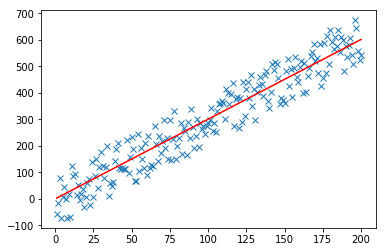

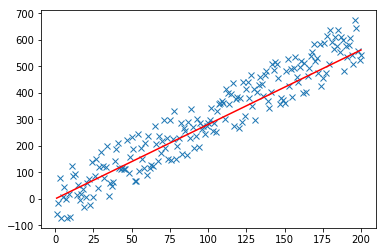

In [35]:
X, Y = generateSample(200)
w_gd = fitModel_gradient(X, Y)
w_sgd = fitModel_stochastic_gradient(X, Y)
plotModel(X,Y,w_gd)
plotModel(X,Y,w_sgd)

In [22]:
X.shape, w_gd.shape, Y.shape

((200, 2), (2, 1), (200, 1))